In [1]:
# Import and initiate
from project_02.forest import Tree
from tic_tac_toe import TicTacToe
from connect_four import ConnectFour

ttt = TicTacToe()
c4 = ConnectFour()

# GameAI
## Project 02 - Game trees and path planning

# ToDo

* 2.1 - The tic tac toe game tree
 * 2.1.1 - Use a graph instead of tree
* 2.2 - MinMax computations
* 2.3 - MinMax search for Connect4
* 2.4 - Breakout
* 2.5 - Path planning

# 2.1 - The tic tac toe game tree

In [2]:
%%time
# Get the game tree data
data = ttt.build_game_tree(ttt.S, ttt.p)
print(data)

({1: 131184, -1: 77904}, 46080, 549945, 294778)
CPU times: user 1min 2s, sys: 1.48 s, total: 1min 4s
Wall time: 1min 2s


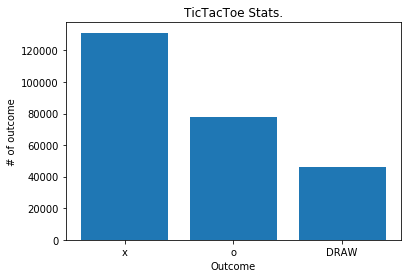

In [3]:
# Plot the tree info
ttt.plot_bar(statistics={1:data[0][1], -1:data[0][-1], 0:data[1]})

* Branching factor: 1.8656 (549945 / 294779)

![tttA](project_02/pictures/two_paths.png)

In [4]:
%%time
# Get game graph data
gdata = ttt.build_game_graph(ttt.S, ttt.p)
print(gdata)

({1: 1834, -1: 948}, 80, 16167, 4520, <networkx.classes.graph.Graph object at 0x7f58633a61d0>)
CPU times: user 2.26 s, sys: 207 ms, total: 2.46 s
Wall time: 2.25 s


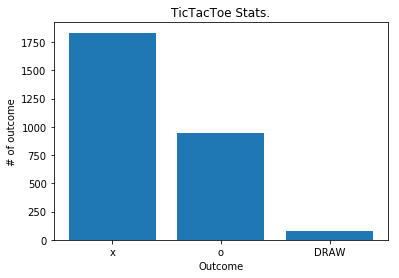

In [5]:
# Plot the graph info
ttt.plot_bar(statistics={1:gdata[0][1], -1:gdata[0][-1], 0:gdata[1]})

* Branching factor: 3.576 (16167 / 4521)

![tttA](project_02/pictures/graph_paths.png)

# 2.2 - MinMax computations

In [6]:
# Setup the tree
tree = Tree(root_label='n0')

for i in range(1,6):
    tree.root.add_child(label='n{}'.format(i))

for i,v in enumerate([15,20,1,3]):
    tree.root.children[0].add_child(label='n{}'.format(i+6), value=v)
    
for i,v in enumerate([3,4]):
    tree.root.children[1].add_child(label='n{}'.format(i+10), value=v)
    
for i,v in enumerate([15,10]):
    tree.root.children[2].add_child(label='n{}'.format(i+12), value=v)
    
for i,v in enumerate([16,4,12]):
    tree.root.children[3].add_child(label='n{}'.format(i+14), value=v)
    
for i,v in enumerate([15,12,8]):
    tree.root.children[4].add_child(label='n{}'.format(i+17), value=v)

![treeA](project_02/pictures/tree.png)

In [7]:
tree.calculate_mmv(print_info=True)

[INFO] Used '-1' and picked '1' of node 'n8'.
[INFO] Used '-1' and picked '3' of node 'n10'.
[INFO] Used '-1' and picked '10' of node 'n13'.
[INFO] Used '-1' and picked '4' of node 'n15'.
[INFO] Used '-1' and picked '8' of node 'n19'.
[INFO] Used '1' and picked '10' of node 'n3'.


(10, 'n3')

![treeB](project_02/pictures/treeB.png)

* Update n1 and n3 value
 * Iterate over sub-nodes

* Do the same on sub-nodes

* Increases everything

# 2.3 - MinMax search for Connect4

## Get some value

* $
    value(Token)= 
\begin{cases}
    10^{|tokens|} + |free|,& \text{if } |token + free| \geq 3\\
    0,              & \text{otherwise}
\end{cases}
$
 * For each direction

* $value(State)=value(Yellow)-value(Red)$

![token_calculation](project_02/pictures/token_calculations.png)

## Tournament (1k games)

In [10]:
%%time
c4.reset_game()
tournament_results = c4.play_a_tournament(use_mmv=True)

=== Lap: 0 ===
'Y'	1
'R'	0
DRAW	0
=== Lap: 100 ===
'Y'	101
'R'	0
DRAW	0
=== Lap: 200 ===
'Y'	201
'R'	0
DRAW	0
=== Lap: 300 ===
'Y'	301
'R'	0
DRAW	0
=== Lap: 400 ===
'Y'	401
'R'	0
DRAW	0
=== Lap: 500 ===
'Y'	501
'R'	0
DRAW	0
=== Lap: 600 ===
'Y'	601
'R'	0
DRAW	0
=== Lap: 700 ===
'Y'	701
'R'	0
DRAW	0
=== Lap: 800 ===
'Y'	801
'R'	0
DRAW	0
=== Lap: 900 ===
'Y'	901
'R'	0
DRAW	0
Tournament results in: 
'Y'	999
'R'	1
DRAW	0
CPU times: user 24min 12s, sys: 355 ms, total: 24min 12s
Wall time: 24min 12s


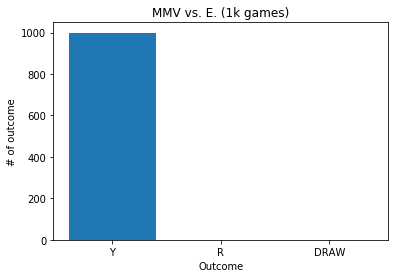

In [11]:
c4.plot_bar(label="MMV vs. E. (1k games)", statistics=tournament_results)

# 2.4 - Breakout

## Controler
* Observe 'Ball'
 * ```python
If ball.center < paddle.x and ball.center > paddle.x + paddle.width:
         paddle.move(key_left or key_right)```

* Ball outruns paddle 
 * paddle.speed is fixed

* Colision checking malfunctions at a to high speed 
 * paddle.speed increases

# 2.5 - Path planning

In [1]:
from project_02.mapper import Map

m = Map("project_02/simpleMap-1-20x20.txt")

In [2]:
m.print_map()

 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 

In [4]:
path = m.get_dijkstra_path((0,10), (15,1), use_nx=False, symbol_print=False)

 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  ▮  ▮ 
 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  ▮ 
 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V 
 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V 
 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V 
 V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V  V 
 V  V  V  V  V  V  V  V  V  V  V  V  ▮  ▮  ▮  ▮  ▮  V  V  V 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  V  V  V  V  ▮  ▮  V  V  V  V  V  V 
 V  V  V  V  V  V  V  ▮  V  V  V  V  ▮  ▮  ▮  V  V  V  V  V 
 V  V  V  V  V  V  V  ▮  V  V  V  V  ▮  ▮  ▮  ▮  V  V  V  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  V  V  V  ▮  ▮  ▮  ▮  ▮  V  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  V  V  V  ▮  V  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  V  V  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮ 

In [5]:
path_a = m.get_astar_path((0,10), (15,1), use_nx=False, symbol_print=False)

 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  V  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮  ▮ 
 V  V  V  V  V  V  V  ▮ 